# 03 Decision Trees
- From Udacity's Intro To Machine Learning class
- Decision Trees allow you to ask multiple linearly separable questions one after another

### 1. Import Terrain Data and graphing functions

In [1]:
import pandas as pd
import numpy as np

In [2]:
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [3]:
## Create the pretty picture funciton again

import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
#import seaborn as SNS
%matplotlib inline

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    plt.show()
    #plt.savefig("test.png")
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

### 2.  SciKitLearn - Example Decision Tree

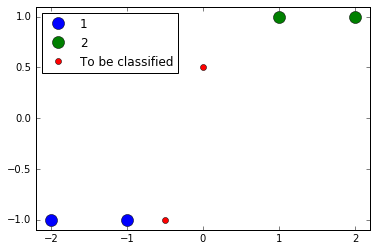

In [4]:
## Example SVC from sklearn website

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = np.array([1, 1, 2, 2])


## Very handy list generation - including for loop in list

x_val = [x[0] for x in X]
y_val = [x[1] for x in X]

df = pd.DataFrame({
        'x_val': x_val,
        'y_val': y_val,
        'label': Y
    })

# Now group this dataframe into the different classes and look at some stats
groups = df.groupby('label')

# Plot
ax = plt.subplot()

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x_val, group.y_val, marker='o', linestyle='', ms=12, label=name)

unknown_x=[-0.5, 0]  
unknown_y=[-1, 0.5]
ax.plot(unknown_x, unknown_y, 'or', label="To be classified")
ax.legend(loc="upper left", numpoints=1)
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, Y)

print "Point (-0.8, -1) is predicted to be class %d" %(clf.predict([[-0.8, -1]]))
print "Point (0, 0.5) is predicted to be class %d" %(clf.predict([[0, 0.5]]))

Point (-0.8, -1) is predicted to be class 1
Point (0, 0.5) is predicted to be class 2


### 3. Apply Decision Tree algorithm to our driving terrain dataset

In [6]:
def classify_DT(features_train, labels_train):   
    from sklearn import tree
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(features_train, labels_train) 
    return clf

Decision Tree with test data


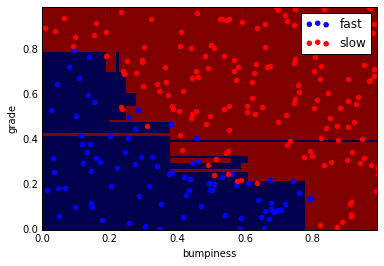

Decision Tree with training data
we can see the points responsible for the shape seen


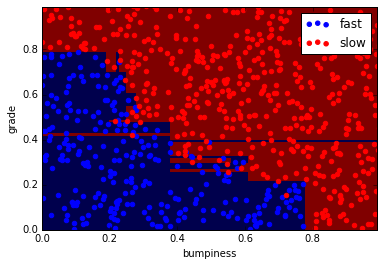

In [7]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf_DT = classify_DT(features_train, labels_train)

### draw the decision boundary with the text points overlaid
print "Decision Tree with test data"
prettyPicture(clf_DT, features_test, labels_test)

print "Decision Tree with training data\nwe can see the points responsible for the shape seen"
prettyPicture(clf_DT, features_train, labels_train)
#output_image("test.png", "png", open("test.png", "rb").read())


In [8]:
## Now as usual we will find the accuracy with this model

pred_DT = clf_DT.predict(features_test)

from sklearn.metrics import accuracy_score

print "NB accuracy was 88.4%"
print "SVM accruacy is 92.0%"
print "Decision Tree accuracy is %s%%" %(100*accuracy_score(pred_DT, labels_test))

NB accuracy was 88.4%
SVM accruacy is 92.0%
Decision Tree accuracy is 90.8%


#### Looking at the above:
- We have a high accuracy but the decision boundary also indicates some over-fitting
- Let's examine some parameter choices

### Look at min_samples_split
- Can we allieviate some of the overfitting?
- min_samples_split=> minimum number of samples needed at our node in order to split further

In [9]:
# Now lets look at some parameter choices

def classify_DT_and_graph(features_train, labels_train, features_test, labels_test, min_split):   
    from sklearn import tree
    from sklearn.metrics import accuracy_score
    
    clf = tree.DecisionTreeClassifier(min_samples_split = min_split)
    clf = clf.fit(features_train, labels_train) 
    
    predictions = clf.predict(features_test)
    
    accuracy = 100*accuracy_score(predictions, labels_test)
                              
    print "Decision Tree with min_split=%d, has an accuracy of %.2f%%" %(min_split, accuracy)
    
    prettyPicture(clf, features_train, labels_train)

Decision Tree with min_split=2, has an accuracy of 90.80%


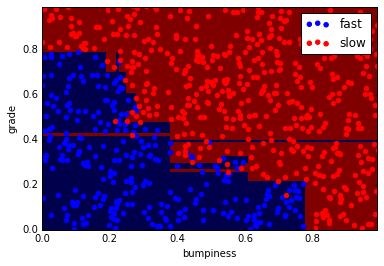

In [10]:
classify_DT_and_graph(features_train, labels_train, features_test, labels_test, 2)

Decision Tree with min_split=50, has an accuracy of 91.20%


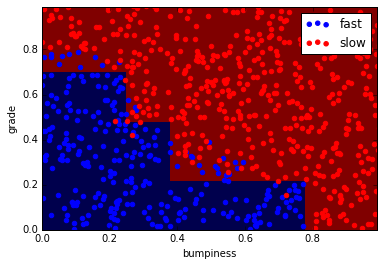

In [11]:
classify_DT_and_graph(features_train, labels_train, features_test, labels_test, 50)

#### Looking at the above:
- Adjusting our min_sample_split avoids overfitting and also increase our accuracy

#### Decision Tree Notes
- Dtree's are easy to use and graphically interperate the data
- Although they are prone to overfitting - careful with the parameter tunes - you must stop the growth of the tree at the apporpriate point
- Dtree's can also be combined into an "ensemble" method (building a classifier from a classifier) e.g. Random Forest
- Entropy is very important for dtree - controls how a dtree decides where to split the data
- Entropy = measure of impurity in a bunch of samples
- Entropy=0 => All same class
- Entropy=1 => Classes are evenly split
- dtree tries to find variables and splits points that will make subsets as pure as possible, and by repeating this process recursively, the dtree will make it's decisions.
- Information_Gain = Entropy(parent) - [weighted_average]Entropy(children) 
- Dtree algorithm will try to maximise information gain (aim for info_gain=1)
- Criterion parameter will alter how the split is made
- Bias-variance dilemma
     - High Bias ML algorithm => Practically ignores the data - can't really learn anything, same result no matter what training data
     - High Variance ML algorithm => Extremely perceptive to data and can only handle something that it's seen before -  react poorly to new situation
- You want a Bias-Variance tradeoff in the middle - able to generalize but also open to new data
- Art of tilting Bias-Variance knob is art of making ML amazing